In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
from scipy.integrate import quad

In [2]:
num_frames = 100
timestep = 0.05
t_vals = np.linspace(0.0, (num_frames-1)*timestep, num_frames)
# print(t_vals)
s_vals = np.linspace(0.0, 2*np.pi, 101)
# s_vals = np.linspace(0.0, 100, 101)
s_vals[0] = 1e-10
s_vals = s_vals[:-1]
print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

[1.00000000e-10 6.28318531e-02 1.25663706e-01 1.88495559e-01
 2.51327412e-01 3.14159265e-01 3.76991118e-01 4.39822972e-01
 5.02654825e-01 5.65486678e-01 6.28318531e-01 6.91150384e-01
 7.53982237e-01 8.16814090e-01 8.79645943e-01 9.42477796e-01
 1.00530965e+00 1.06814150e+00 1.13097336e+00 1.19380521e+00
 1.25663706e+00 1.31946891e+00 1.38230077e+00 1.44513262e+00
 1.50796447e+00 1.57079633e+00 1.63362818e+00 1.69646003e+00
 1.75929189e+00 1.82212374e+00 1.88495559e+00 1.94778745e+00
 2.01061930e+00 2.07345115e+00 2.13628300e+00 2.19911486e+00
 2.26194671e+00 2.32477856e+00 2.38761042e+00 2.45044227e+00
 2.51327412e+00 2.57610598e+00 2.63893783e+00 2.70176968e+00
 2.76460154e+00 2.82743339e+00 2.89026524e+00 2.95309709e+00
 3.01592895e+00 3.07876080e+00 3.14159265e+00 3.20442451e+00
 3.26725636e+00 3.33008821e+00 3.39292007e+00 3.45575192e+00
 3.51858377e+00 3.58141563e+00 3.64424748e+00 3.70707933e+00
 3.76991118e+00 3.83274304e+00 3.89557489e+00 3.95840674e+00
 4.02123860e+00 4.084070

In [3]:
num_alphas = 10
alphlowlim = 0.0
alphhighlim = 0.9
num_ds = 50
dlowlim = 0.0
dhighlim = 4.9

In [4]:
alpha_vals = np.linspace(alphlowlim, alphhighlim, num_alphas)
print(alpha_vals)
alpha_vals[0] = 1e-10 # set alpha=0 to a small value
d_vals = np.linspace(dlowlim, dhighlim, num_ds)
print(d_vals)
d_vals[0] = 1e-10 # set d=0 to a small value

# print the shape of the data
print(f"shape of alpha_vals : {alpha_vals.shape}")
print(f"shape of d_vals : {d_vals.shape}")

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
shape of alpha_vals : (10,)
shape of d_vals : (50,)


In [5]:
# load the data from G_pred.txt
# the data is of shape (time_frames, r_vals.shape[0])
G_pred = np.loadtxt("G_pred_test.txt")
print(f"shape of G_pred : {G_pred.shape}")

shape of G_pred : (100, 500)


In [6]:
############### check this step ################
G_pred = G_pred * 2 * np.pi * r_vals
############### check this step ################

In [7]:
# apply fft on r to get G_pred_k(t, k)
G_pred_k = fft.fft(G_pred, axis=1).real
print(f"shape of G_pred after fft : {G_pred.shape}")
# print(f"max value of G_pred : {np.max(G_pred)}")

shape of G_pred after fft : (100, 500)


In [8]:
# get the range of k values
k_vals = fft.fftfreq(r_vals.shape[0], d=r_vals[1]-r_vals[0])
# k_vals = 2 * np.pi * k_vals
# print(k_vals)
print(f"shape of k_vals : {k_vals.shape}")

shape of k_vals : (500,)


In [9]:
# laplace transform of G_pred_k(t, k) on time to get u_pred(s, k)
u_pred = np.zeros((s_vals.shape[0], k_vals.shape[0]))
for i in range(s_vals.shape[0]):
    for j in range(k_vals.shape[0]):
        u_pred[i, j] = np.trapz(G_pred_k[:, j] * np.exp(-s_vals[i] * t_vals), t_vals)
print(f"shape of u_pred : {u_pred.shape}")

shape of u_pred : (100, 500)


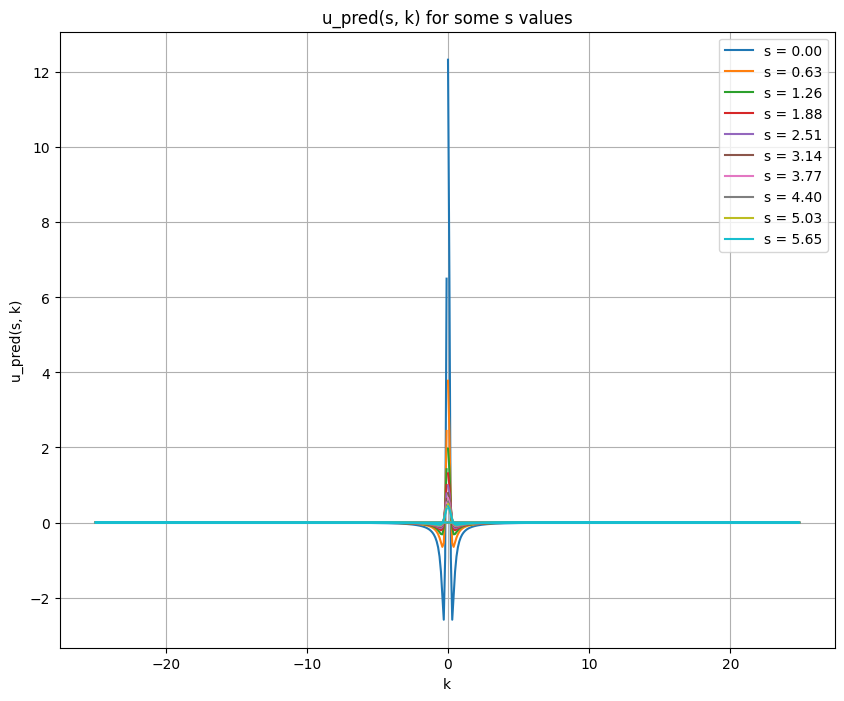

In [10]:
# plot the u_pred(s, k) for some s values
plt.figure(figsize=(10, 8))
plt.title("u_pred(s, k) for some s values")
plt.xlabel("k")
plt.ylabel("u_pred(s, k)")
plt.grid()
for i in range(0, s_vals.shape[0], 10):
    plt.plot(k_vals, u_pred[i, :], label=f"s = {s_vals[i]:.2f}")

plt.legend()
plt.show()

In [11]:
# save the data to u_pred.txt
np.savetxt("u.txt", u_pred)

$Z(\alpha, D, s, k) = \frac{s^{\alpha-1}}{s^{\alpha-1}+Dk^2}$

In [12]:
# calculate Z
# $Z(\alpha, D, s, k) = \frac{s^{\alpha-1}}{s^{\alpha-1}+Dk^2}$
Z = np.zeros((alpha_vals.shape[0], d_vals.shape[0], s_vals.shape[0], k_vals.shape[0]))
for i in range(alpha_vals.shape[0]):
    for j in range(d_vals.shape[0]):
        for k in range(s_vals.shape[0]):
            Z[i, j, k, :] = (s_vals[k]**(alpha_vals[i]-1)) / (s_vals[k]**(alpha_vals[i]-1) + d_vals[j]*k_vals**2)
print(f"shape of Z : {Z.shape}")

shape of Z : (10, 50, 100, 500)


In [13]:
# save the data to Z.npy
np.save("Z.npy", Z)